<a href="https://colab.research.google.com/github/Kickhands/Yolov12-DetectionObject/blob/main/Yolov12VechileDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Nov 15 19:41:30 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   77C    P0             35W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install ultralytics

In [3]:
import os

In [4]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.7/112.6 GB disk)


In [5]:
from ultralytics import YOLO
from IPython.display import Image

In [6]:
HOME = os.getcwd()
print(HOME)

/content


In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="TcaLNZLqMGI3J22Lccon")
project = rf.workspace("kickhands").project("detectionmotorcycle-0hskx")
version = project.version(1)
dataset = version.download("yolov12")

loading Roboflow workspace...
loading Roboflow project...


In [8]:
!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [9]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml


In [10]:
!cat {dataset.location}/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 2
names: ['Motorcycle', 'car']

roboflow:
test: ../test/images
train: ../train/images
val: ../valid/images


In [11]:
model = YOLO("yolo12s.yaml")

In [12]:
results = model.train(data=f'{dataset.location}/data.yaml',epochs = 50) ##Must be 50

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/DetectionMotorcycle-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12s.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plo

In [13]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/detect/train/

args.yaml			 results.csv	     val_batch0_labels.jpg
BoxF1_curve.png			 results.png	     val_batch0_pred.jpg
BoxP_curve.png			 train_batch0.jpg    val_batch1_labels.jpg
BoxPR_curve.png			 train_batch1.jpg    val_batch1_pred.jpg
BoxR_curve.png			 train_batch2.jpg    val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch430.jpg  val_batch2_pred.jpg
confusion_matrix.png		 train_batch431.jpg  weights
labels.jpg			 train_batch432.jpg


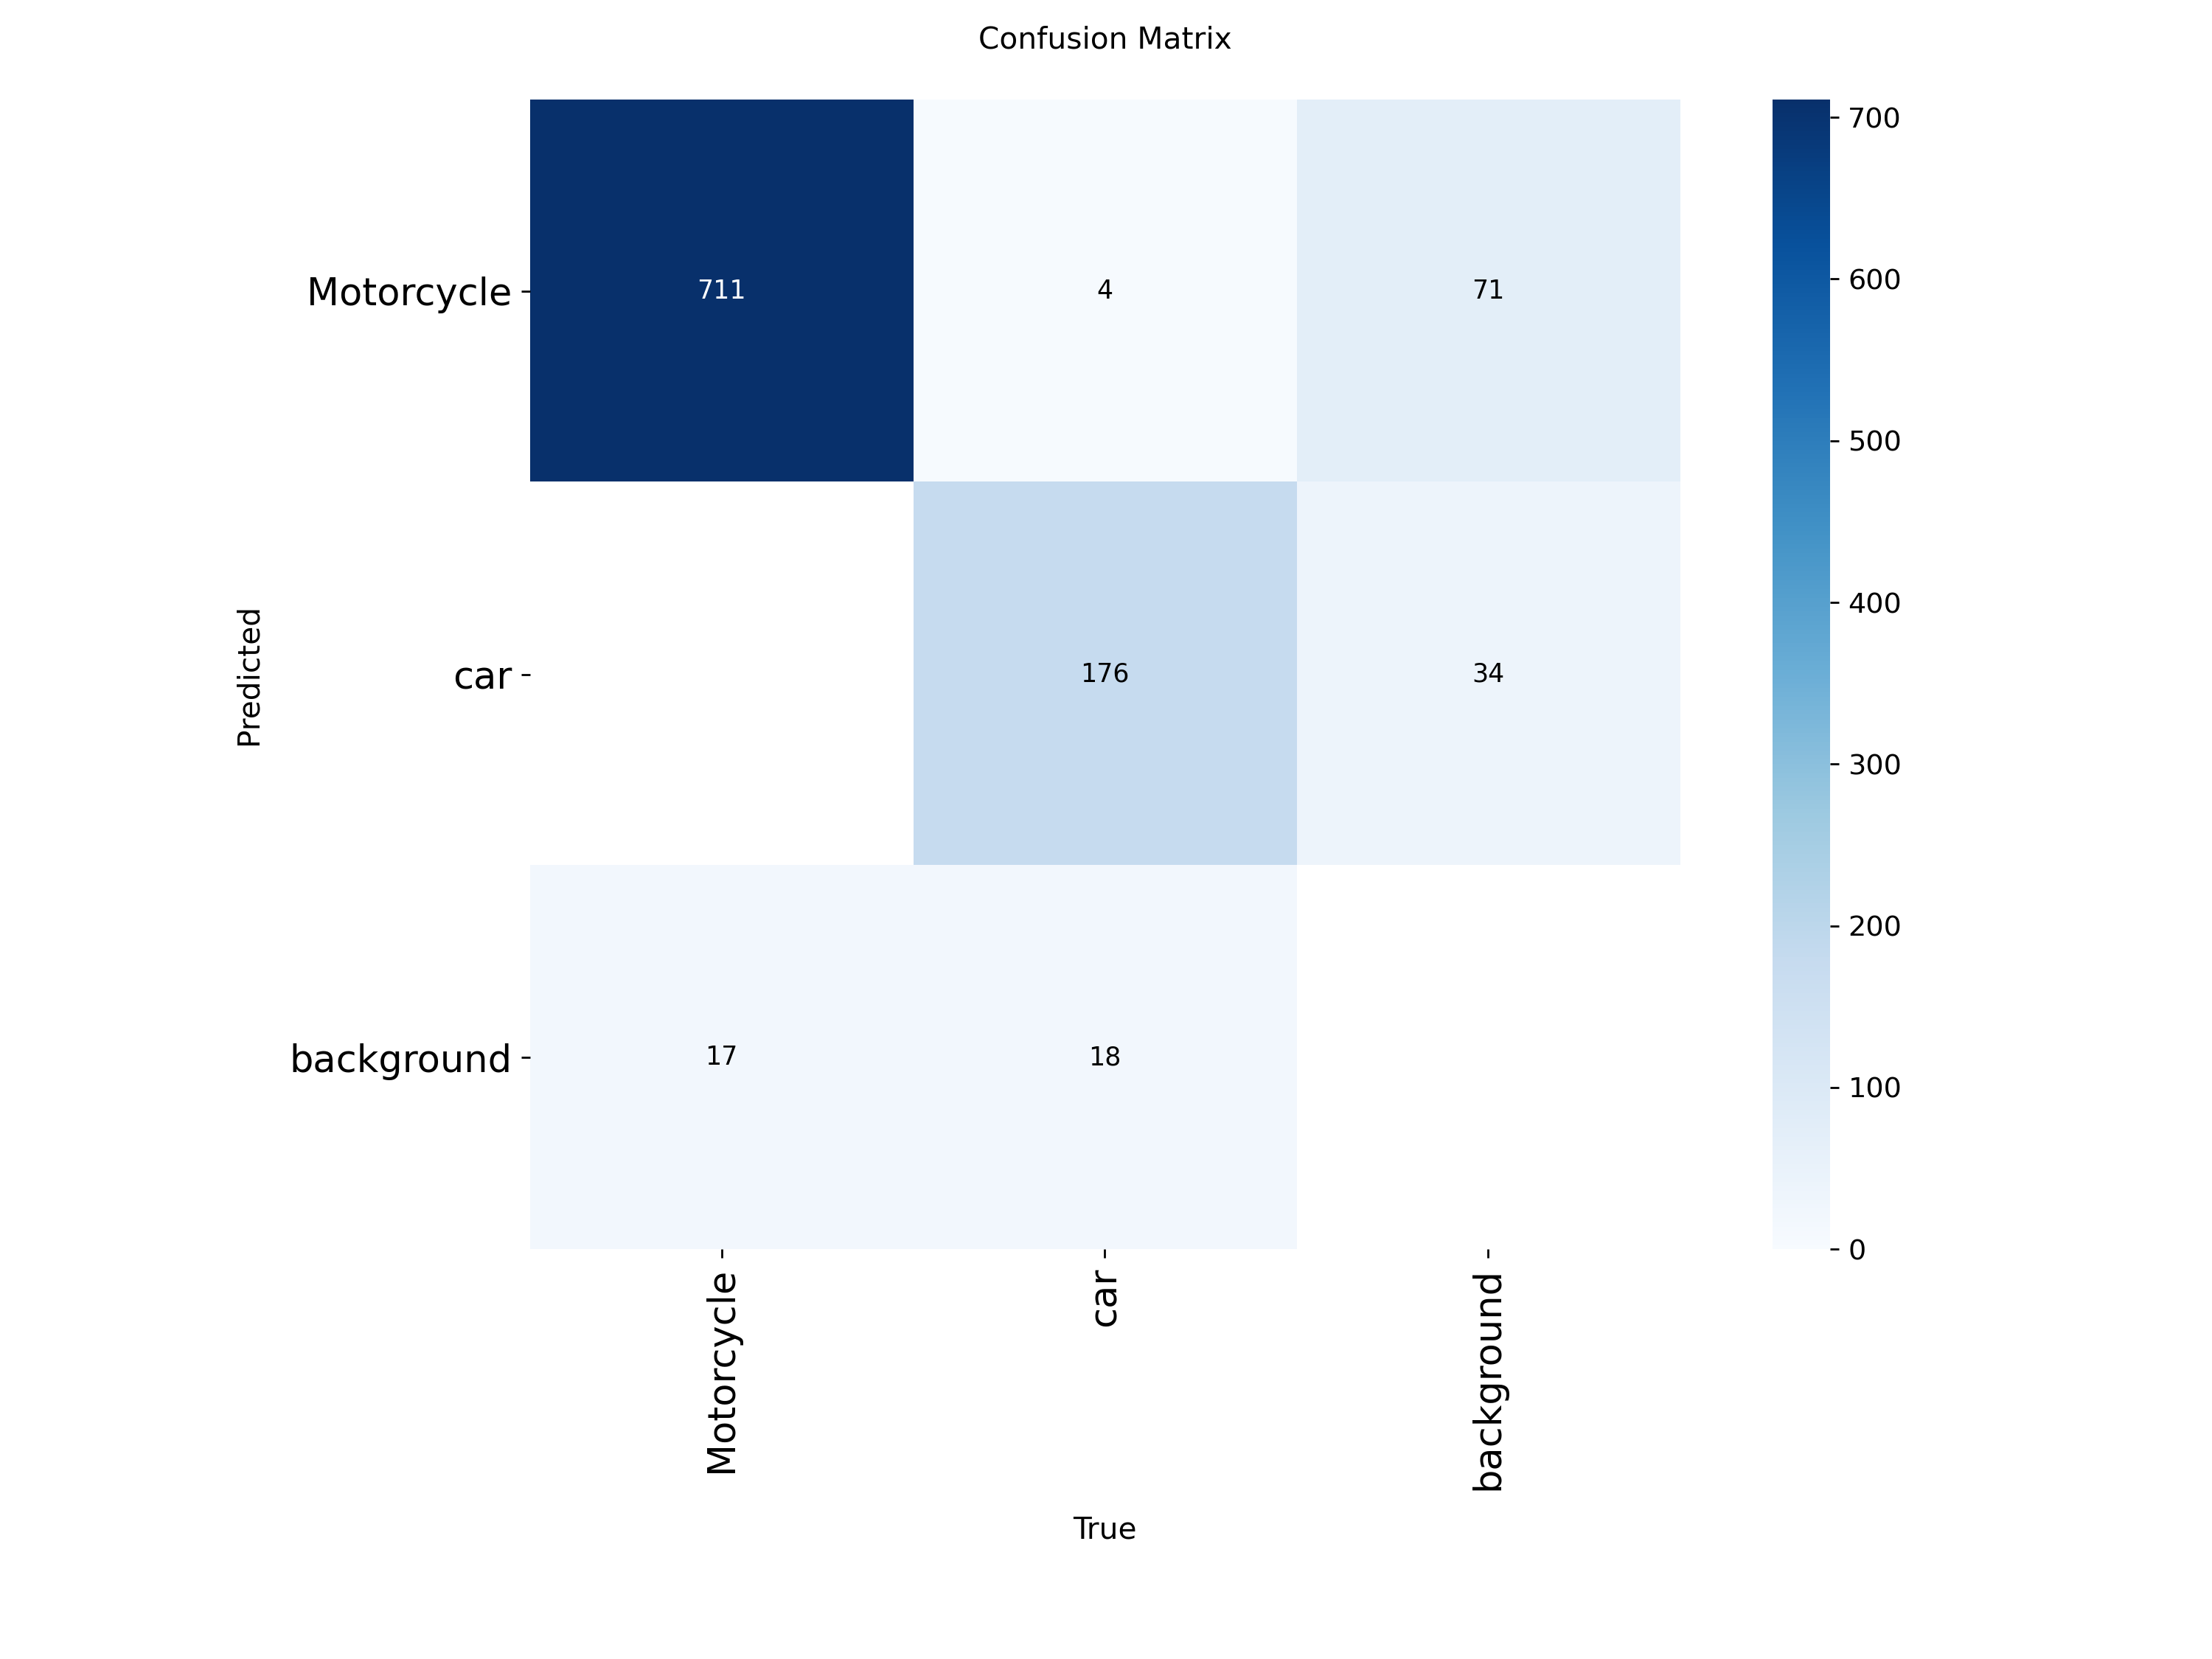

In [14]:
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png',width=1000)

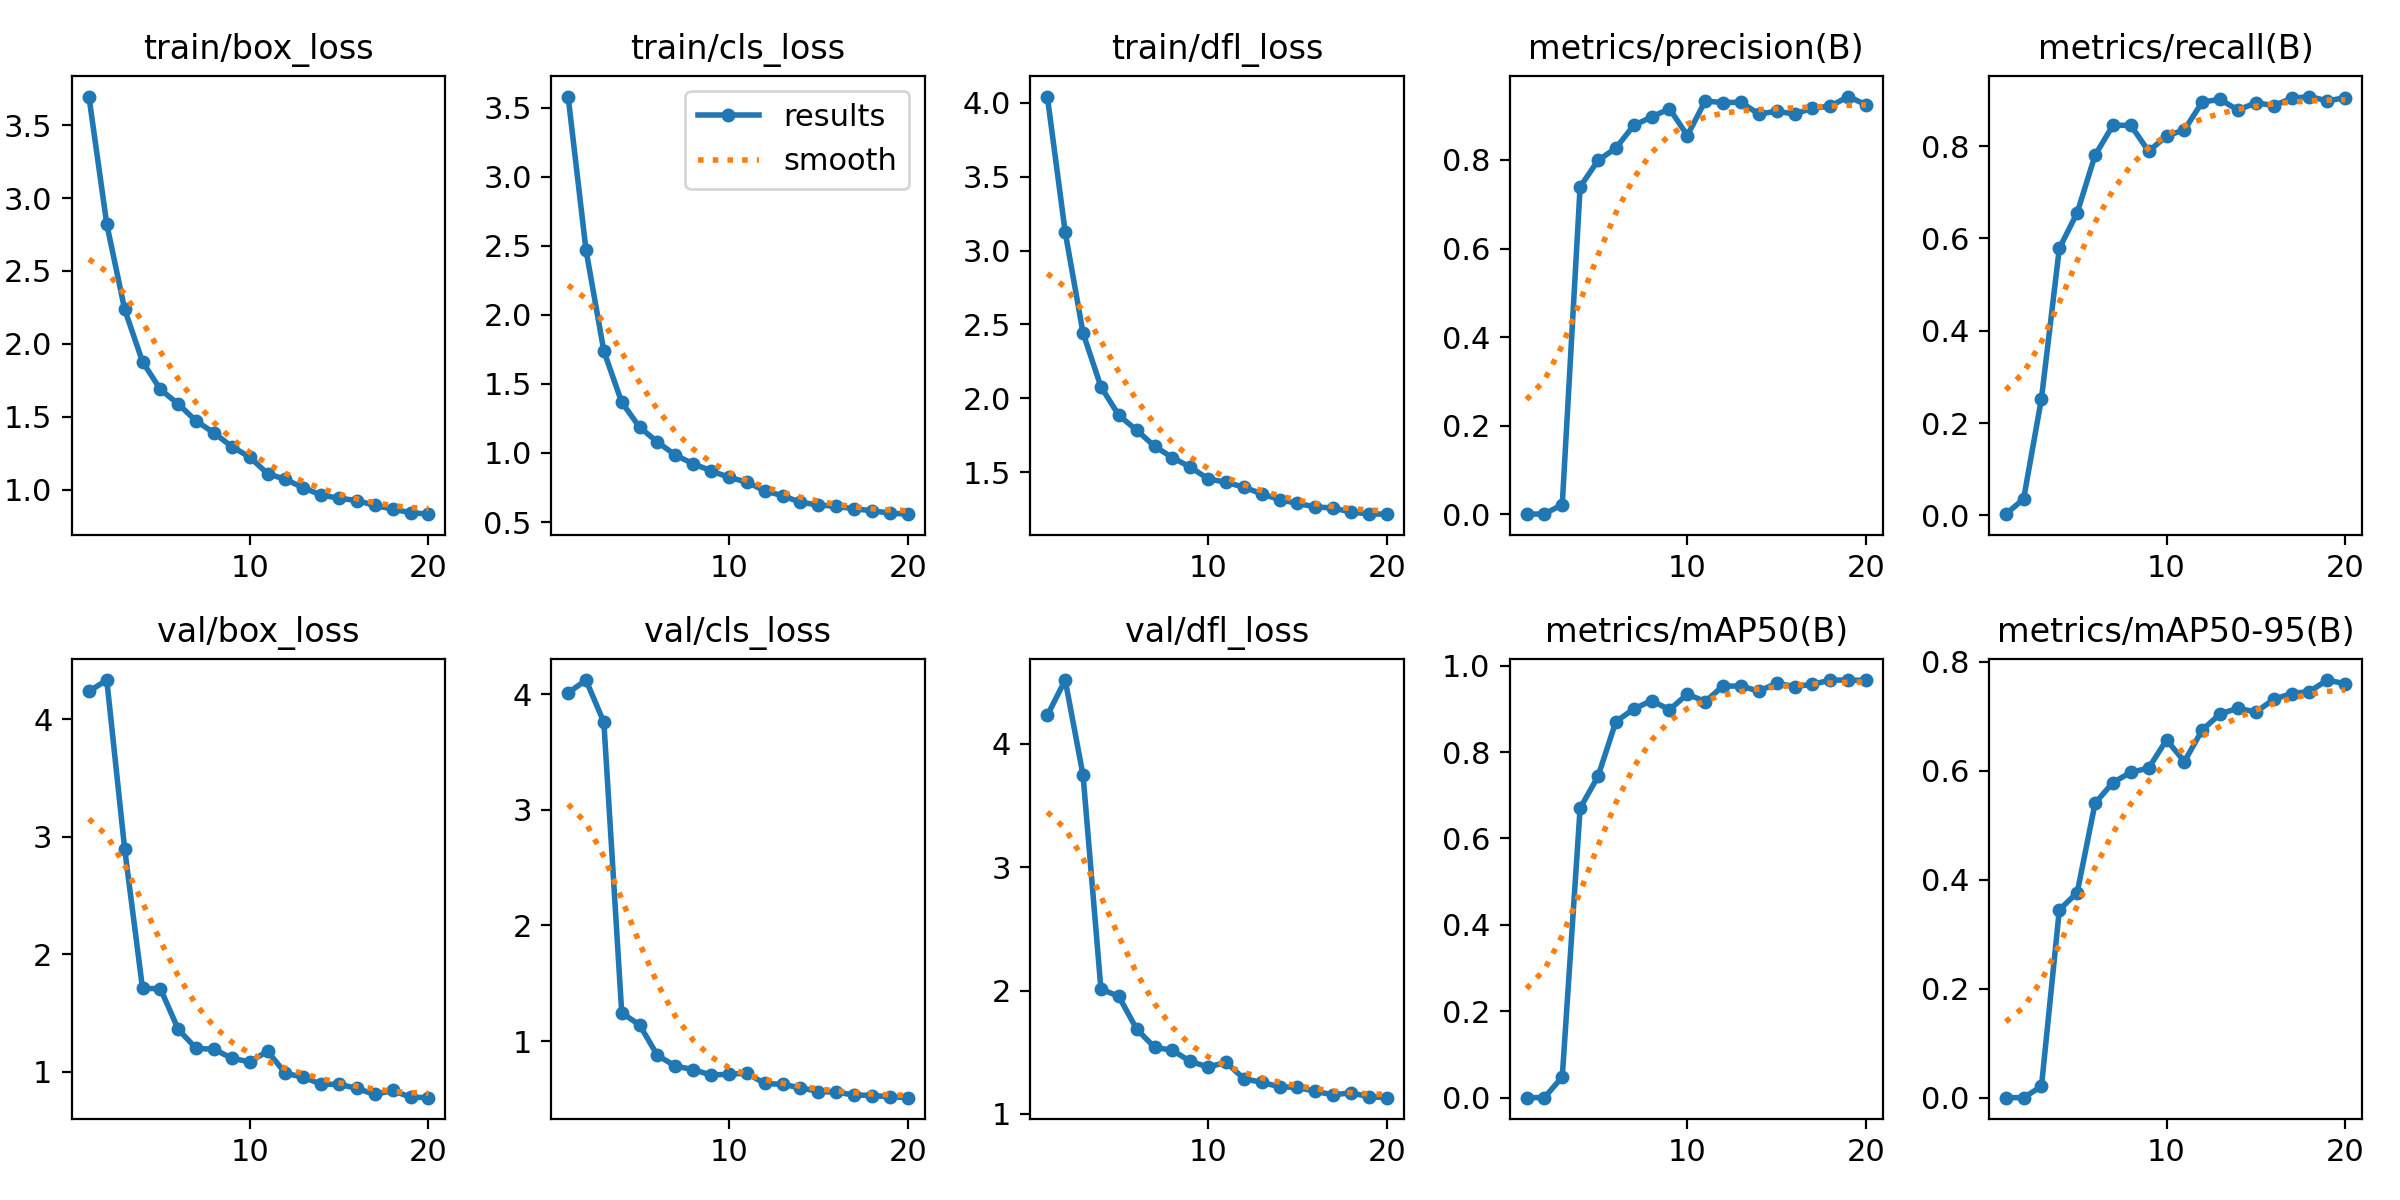

In [15]:
Image(filename=f'{HOME}/runs/detect/train/results.png',width=1000)

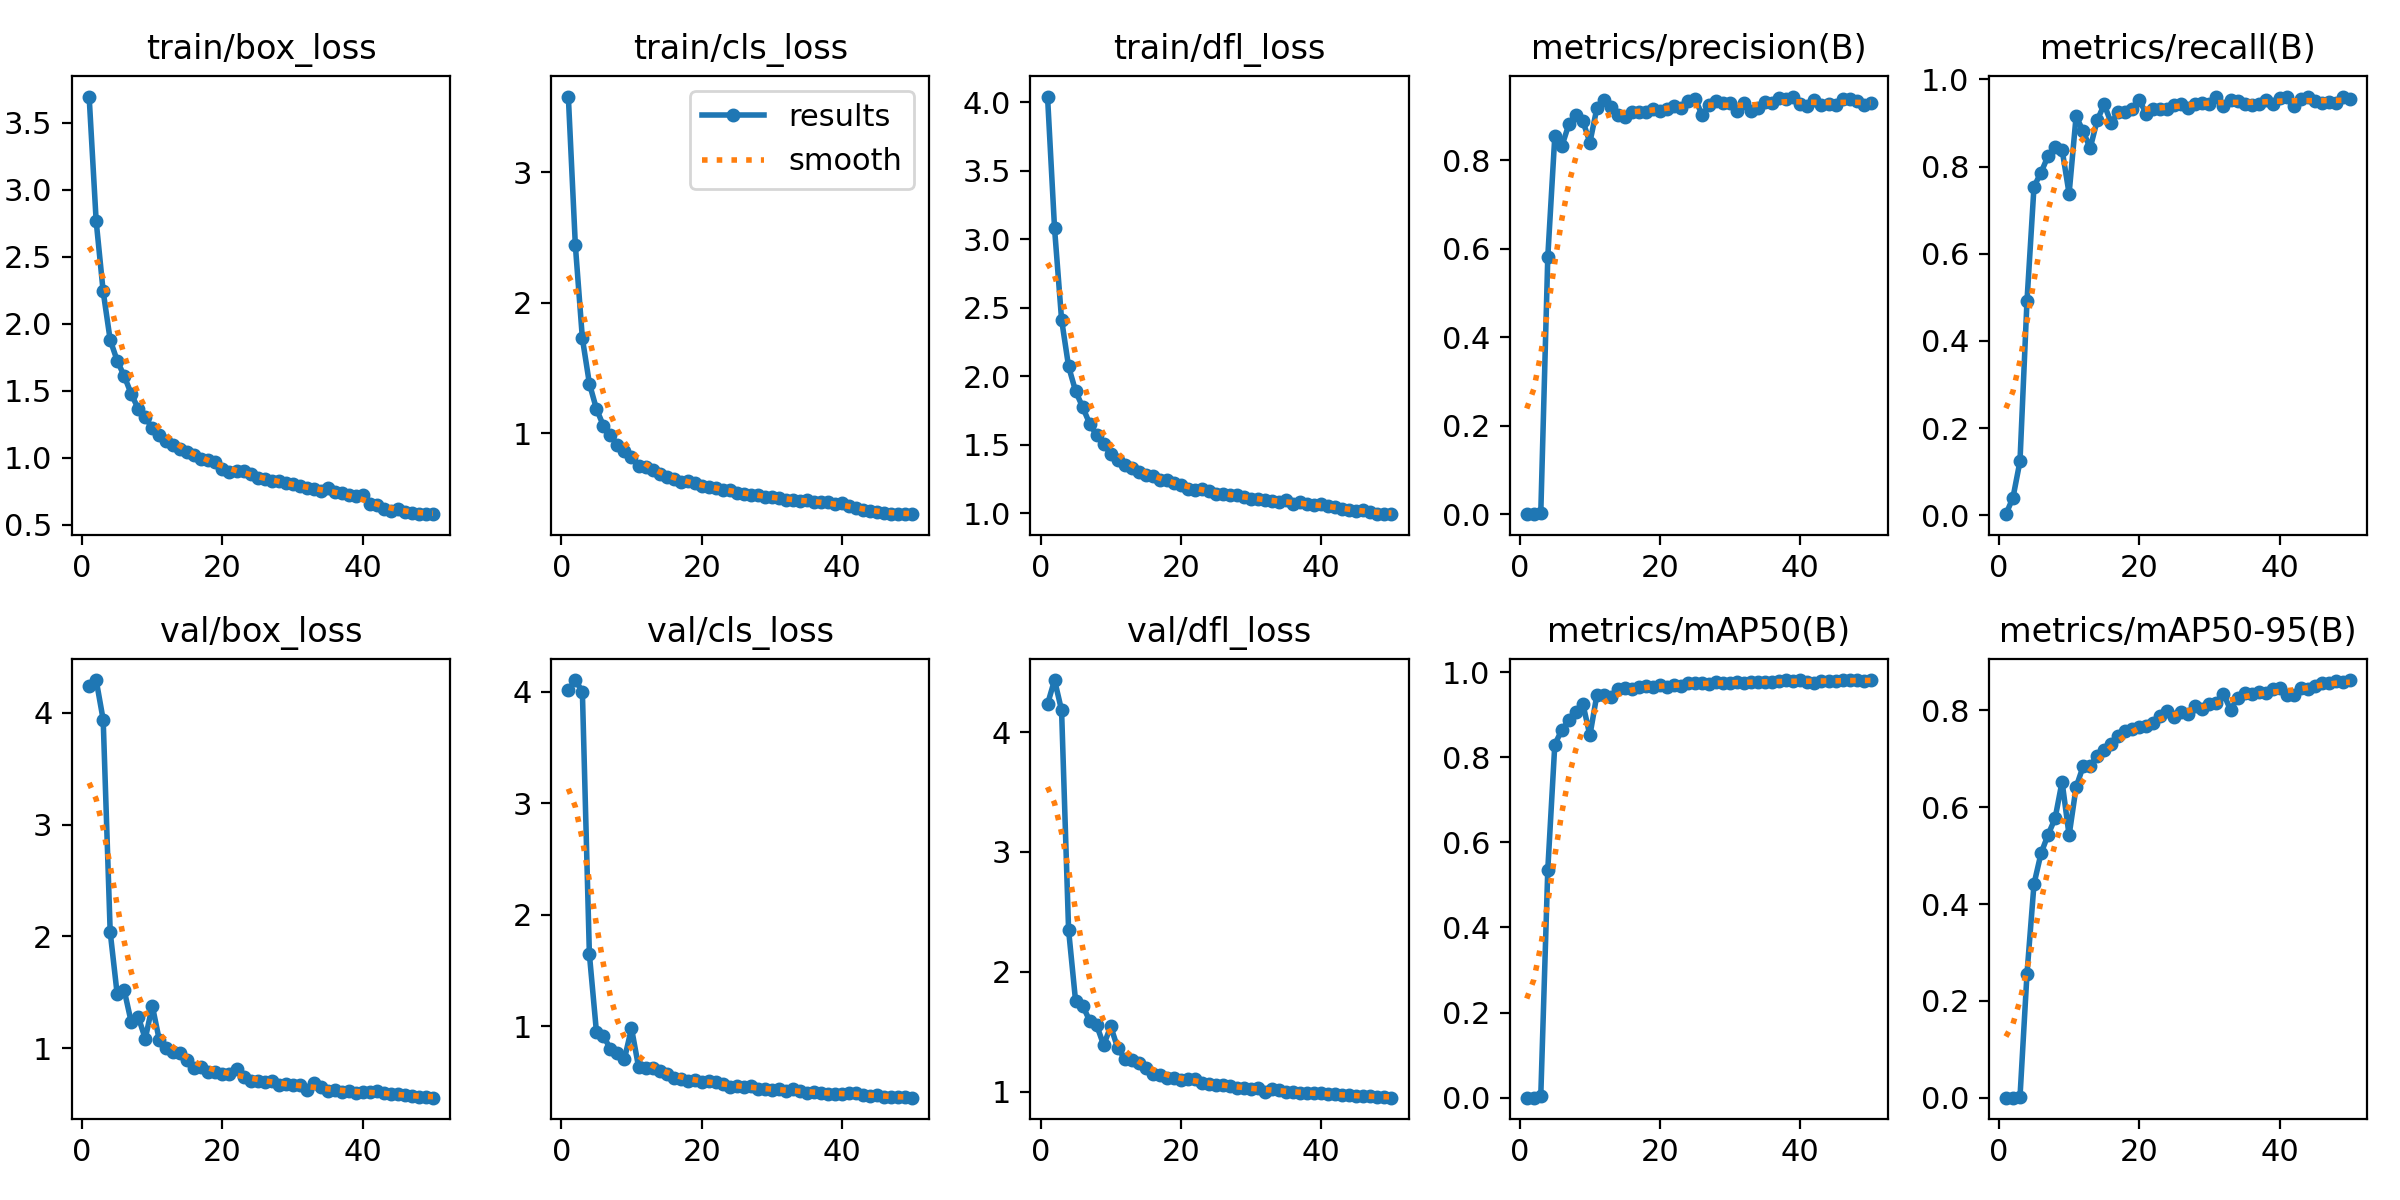

In [21]:
Image(filename=f'{HOME}/runs/detect/train2/results.png',width=1000)

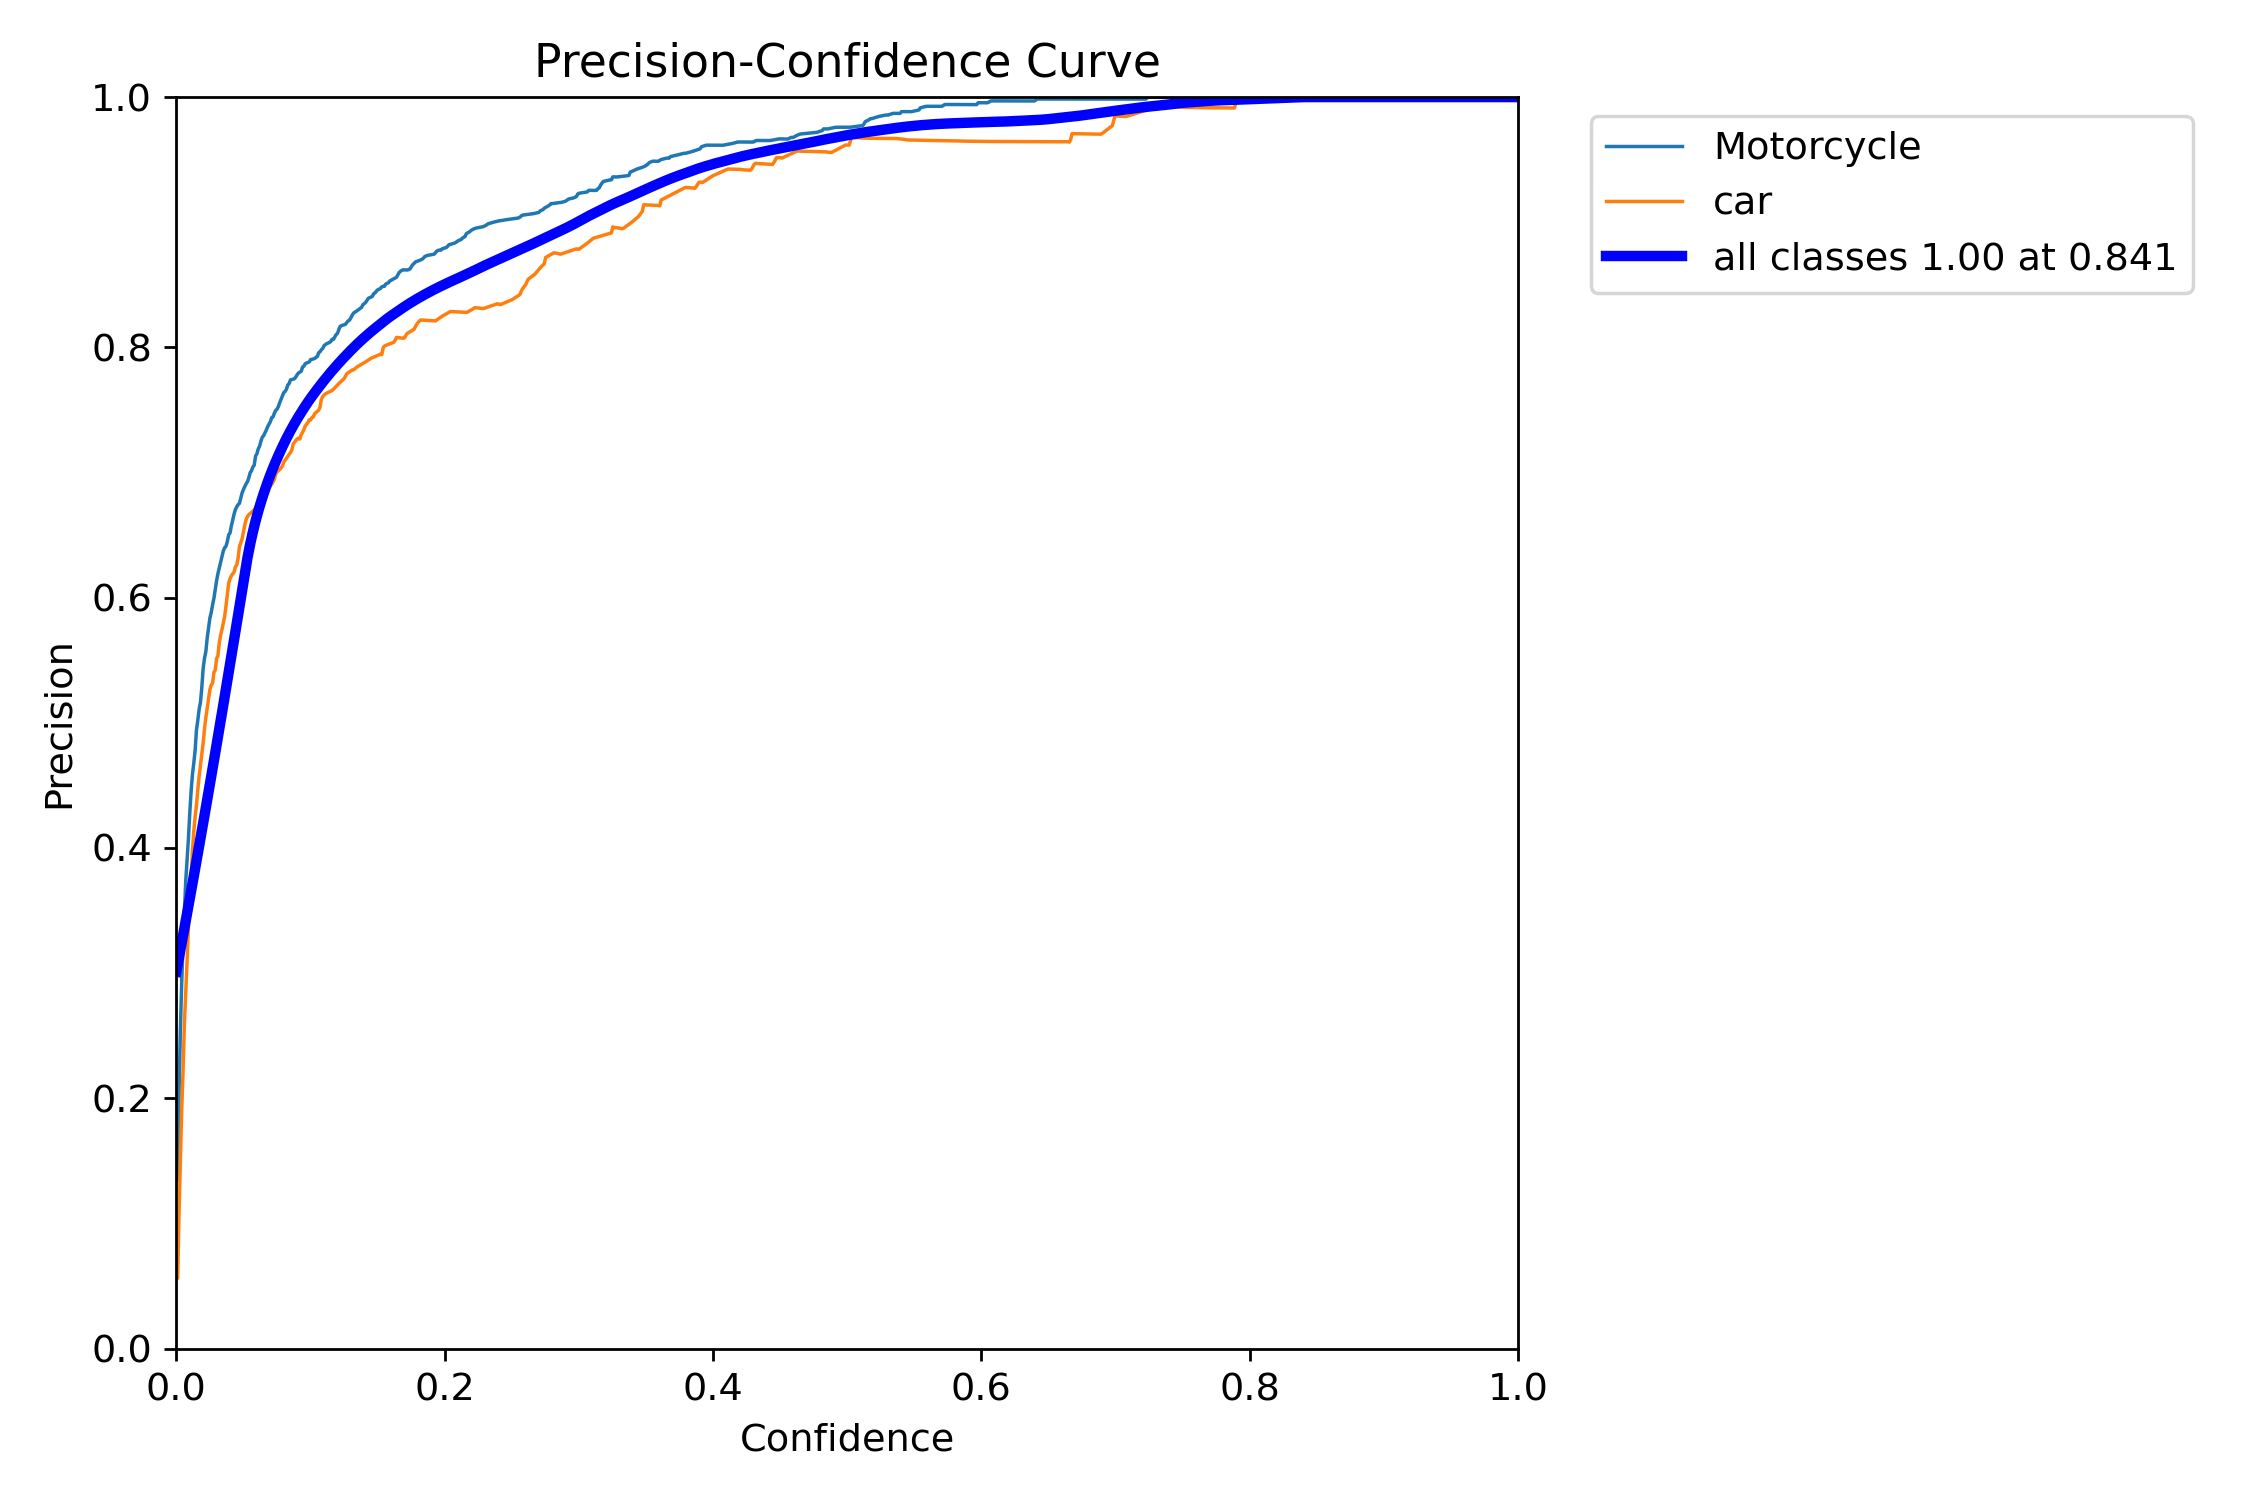

In [16]:
Image(filename=f'{HOME}/runs/detect/train/BoxP_curve.png',width=1000)

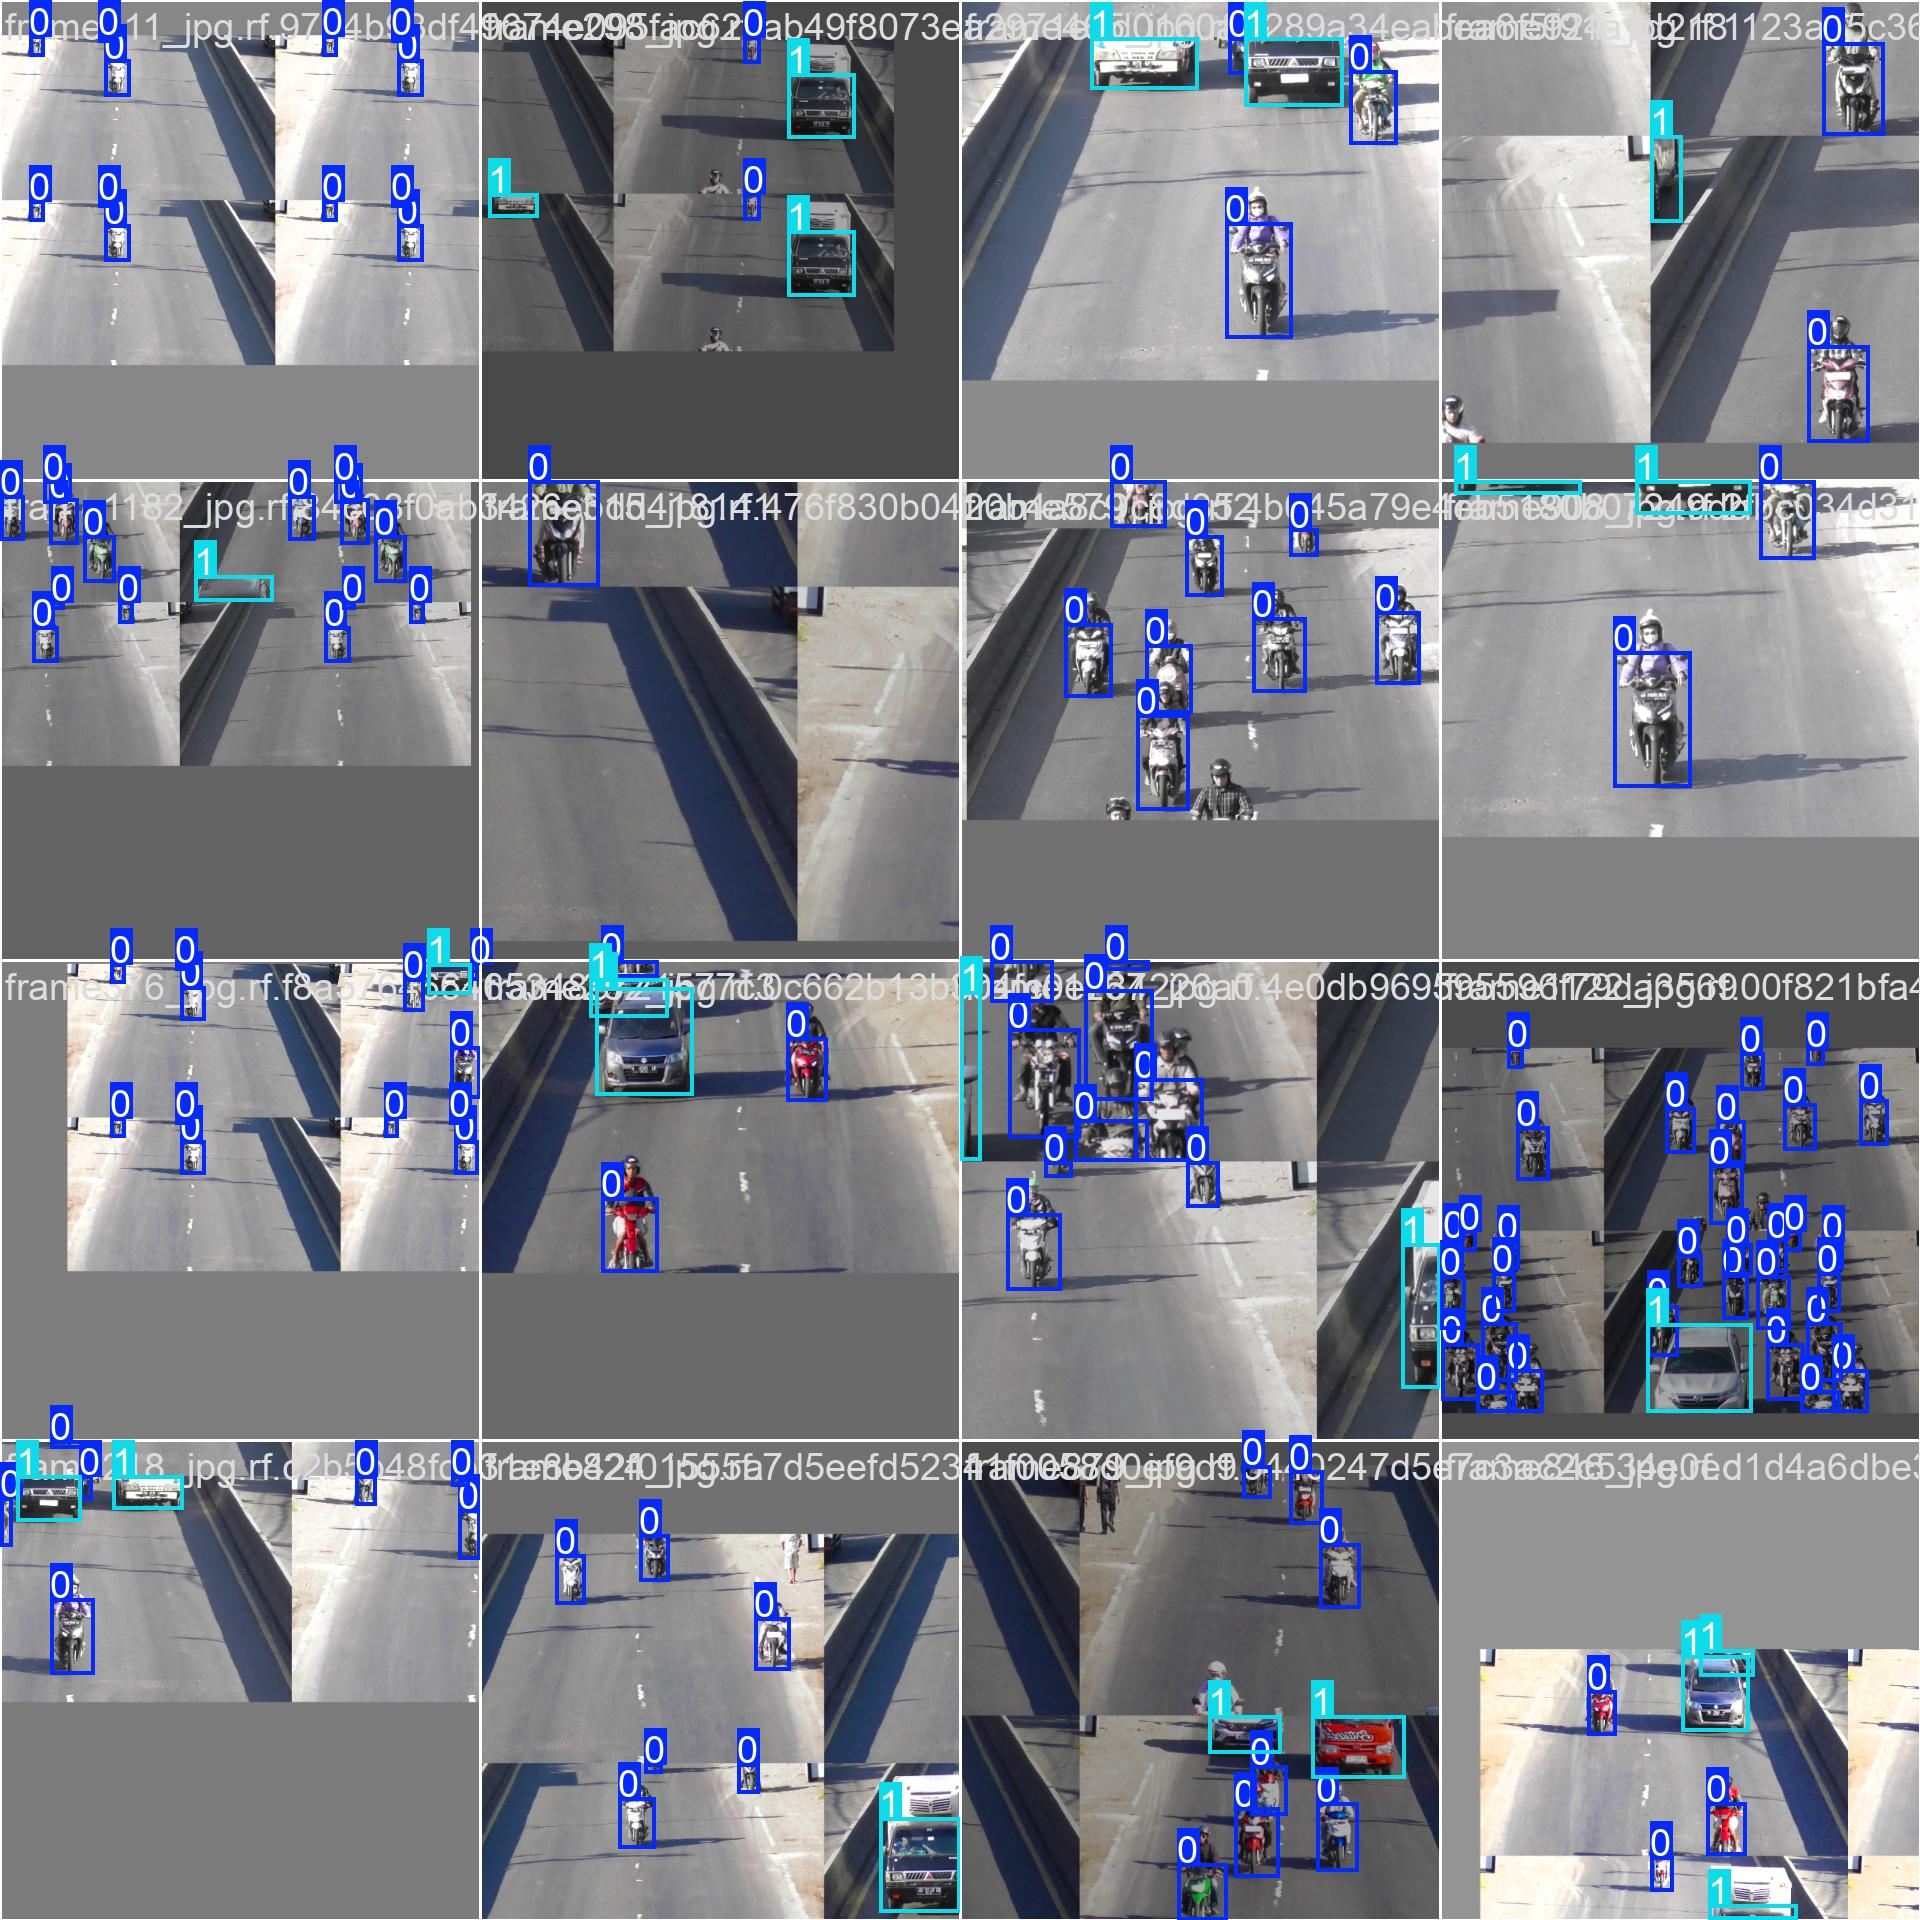

In [17]:
Image(filename=f'{HOME}/runs/detect/train/train_batch0.jpg',width=1000)

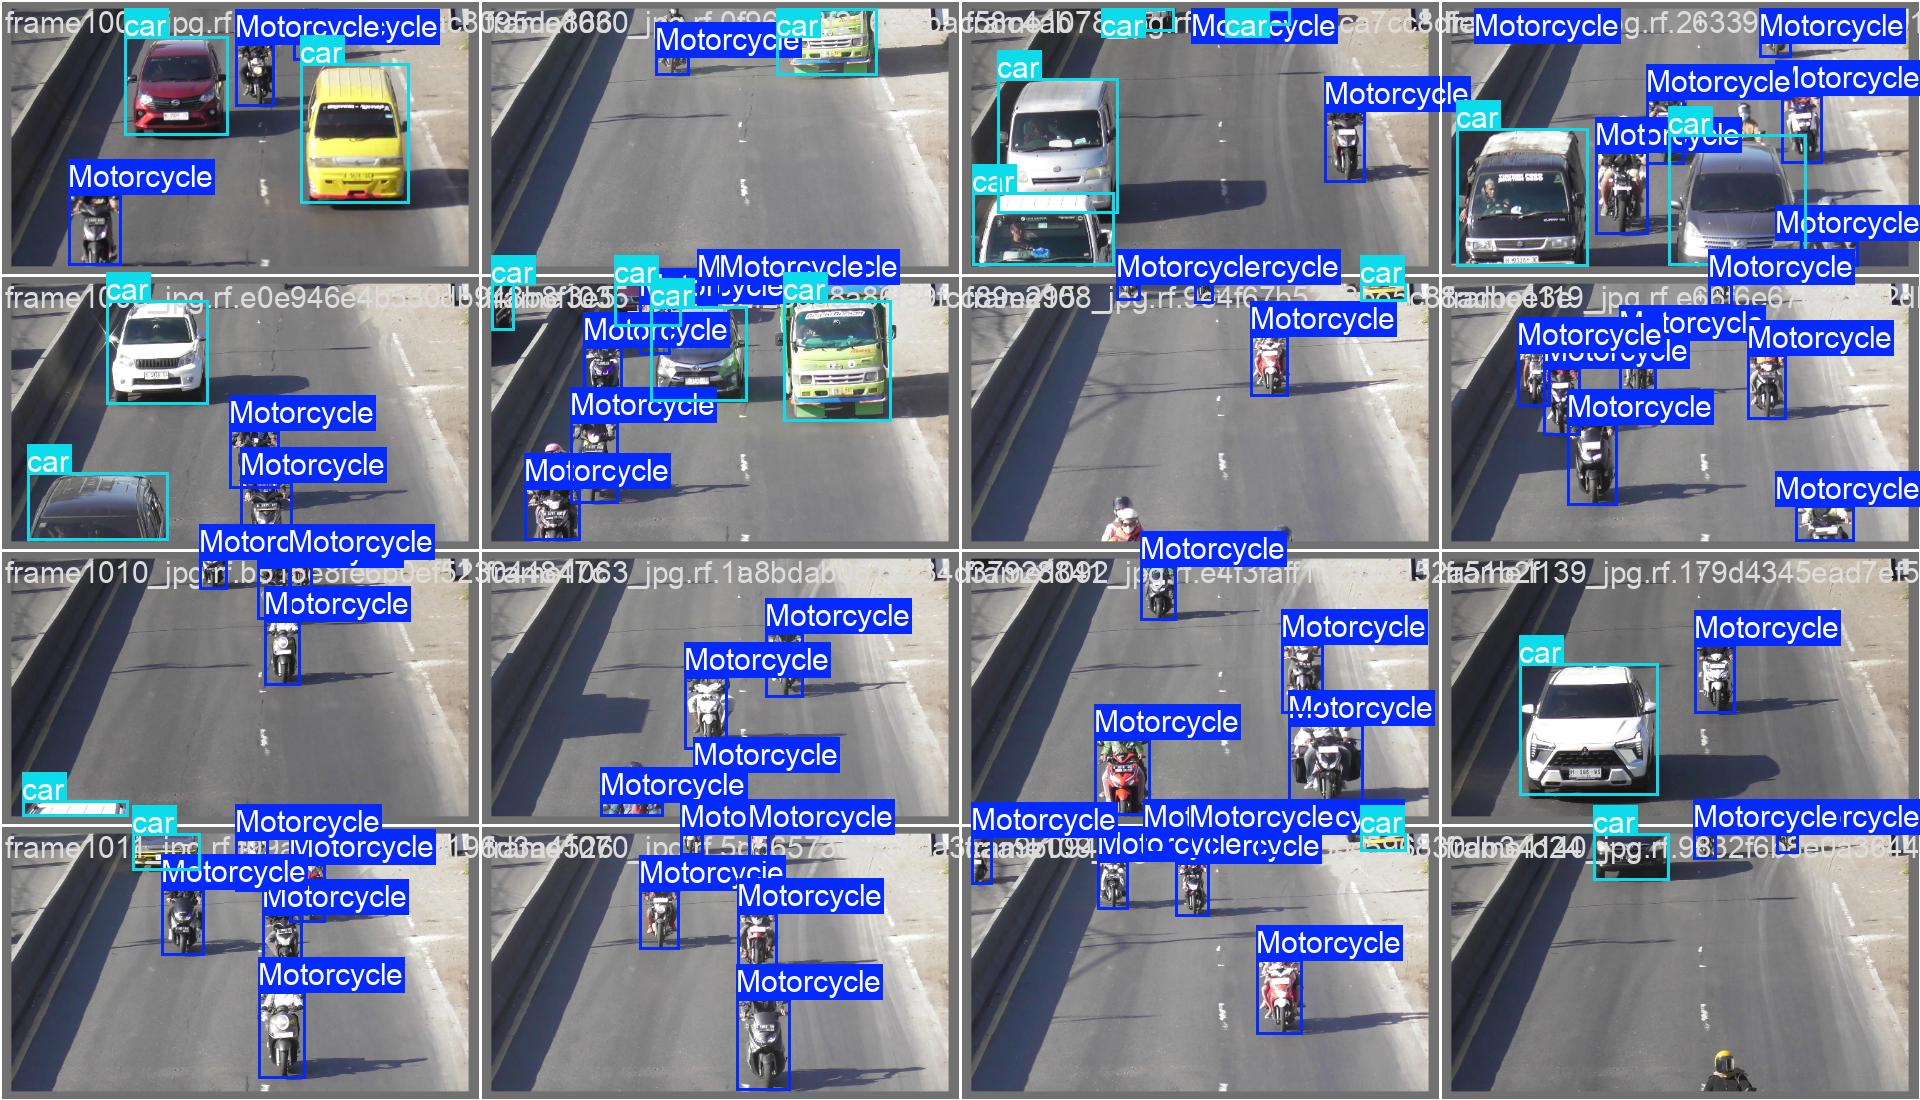

In [18]:
Image(filename=f'{HOME}/runs/detect/train/val_batch0_labels.jpg',width=1000)

In [25]:
!ls -la /content/runs/detect/train2/weights/

total 36944
drwxr-xr-x 2 root root     4096 Nov 15 19:42 .
drwxr-xr-x 3 root root     4096 Nov 15 20:01 ..
-rw-r--r-- 1 root root 18908314 Nov 15 20:01 best.pt
-rw-r--r-- 1 root root 18908314 Nov 15 20:01 last.pt


In [26]:
from google.colab import files
files.download('/content/runs/detect/train2/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
model = YOLO("best.pt")

metrics = model.val()
metrics.box.map
metrics.box.map50
metrics.box.map75
metrics.box.maps

Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO12s summary (fused): 159 layers, 9,231,654 parameters, 0 gradients, 21.2 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2679.0±852.0 MB/s, size: 161.8 KB)
val: Scanning /content/DetectionMotorcycle-1/valid/labels.cache... 145 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 145/145 296.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 10/10 2.5it/s 4.0s
                   all        145        926      0.929      0.954      0.981      0.863
            Motorcycle        139        728      0.971      0.979      0.993      0.874
                   car        115        198      0.888      0.929      0.969      0.851
Speed: 2.4ms preprocess, 9.2ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to /content/runs/detect/val


array([    0.87434,     0.85112])

In [30]:
dataset.location

'/content/DetectionMotorcycle-1'

In [31]:
results = model.predict(source = f"{dataset.location}/test/images", save = True)


image 1/144 /content/DetectionMotorcycle-1/test/images/frame1014_jpg.rf.59f6b62a862587ee4f0f8750a821d09e.jpg: 384x640 3 Motorcycles, 1 car, 57.2ms
image 2/144 /content/DetectionMotorcycle-1/test/images/frame1017_jpg.rf.0a567c1c0f183e636d9e99d4a466f89e.jpg: 384x640 9 Motorcycles, 13.7ms
image 3/144 /content/DetectionMotorcycle-1/test/images/frame1019_jpg.rf.1a94b1d771d36cd259ab6f60fc963f69.jpg: 384x640 8 Motorcycles, 1 car, 23.5ms
image 4/144 /content/DetectionMotorcycle-1/test/images/frame1021_jpg.rf.2bfc474ebf194802107c561bea6e810a.jpg: 384x640 9 Motorcycles, 30.0ms
image 5/144 /content/DetectionMotorcycle-1/test/images/frame1032_jpg.rf.7522d4542bee41ed0f4f31cc1a6b1ecf.jpg: 384x640 3 Motorcycles, 2 cars, 28.2ms
image 6/144 /content/DetectionMotorcycle-1/test/images/frame1042_jpg.rf.06a17189fe12f073088af628ef7f0260.jpg: 384x640 6 Motorcycles, 2 cars, 27.0ms
image 7/144 /content/DetectionMotorcycle-1/test/images/frame1047_jpg.rf.c55b5ba1eaca15ab64b90dd2c1a389f4.jpg: 384x640 6 Motorcycl

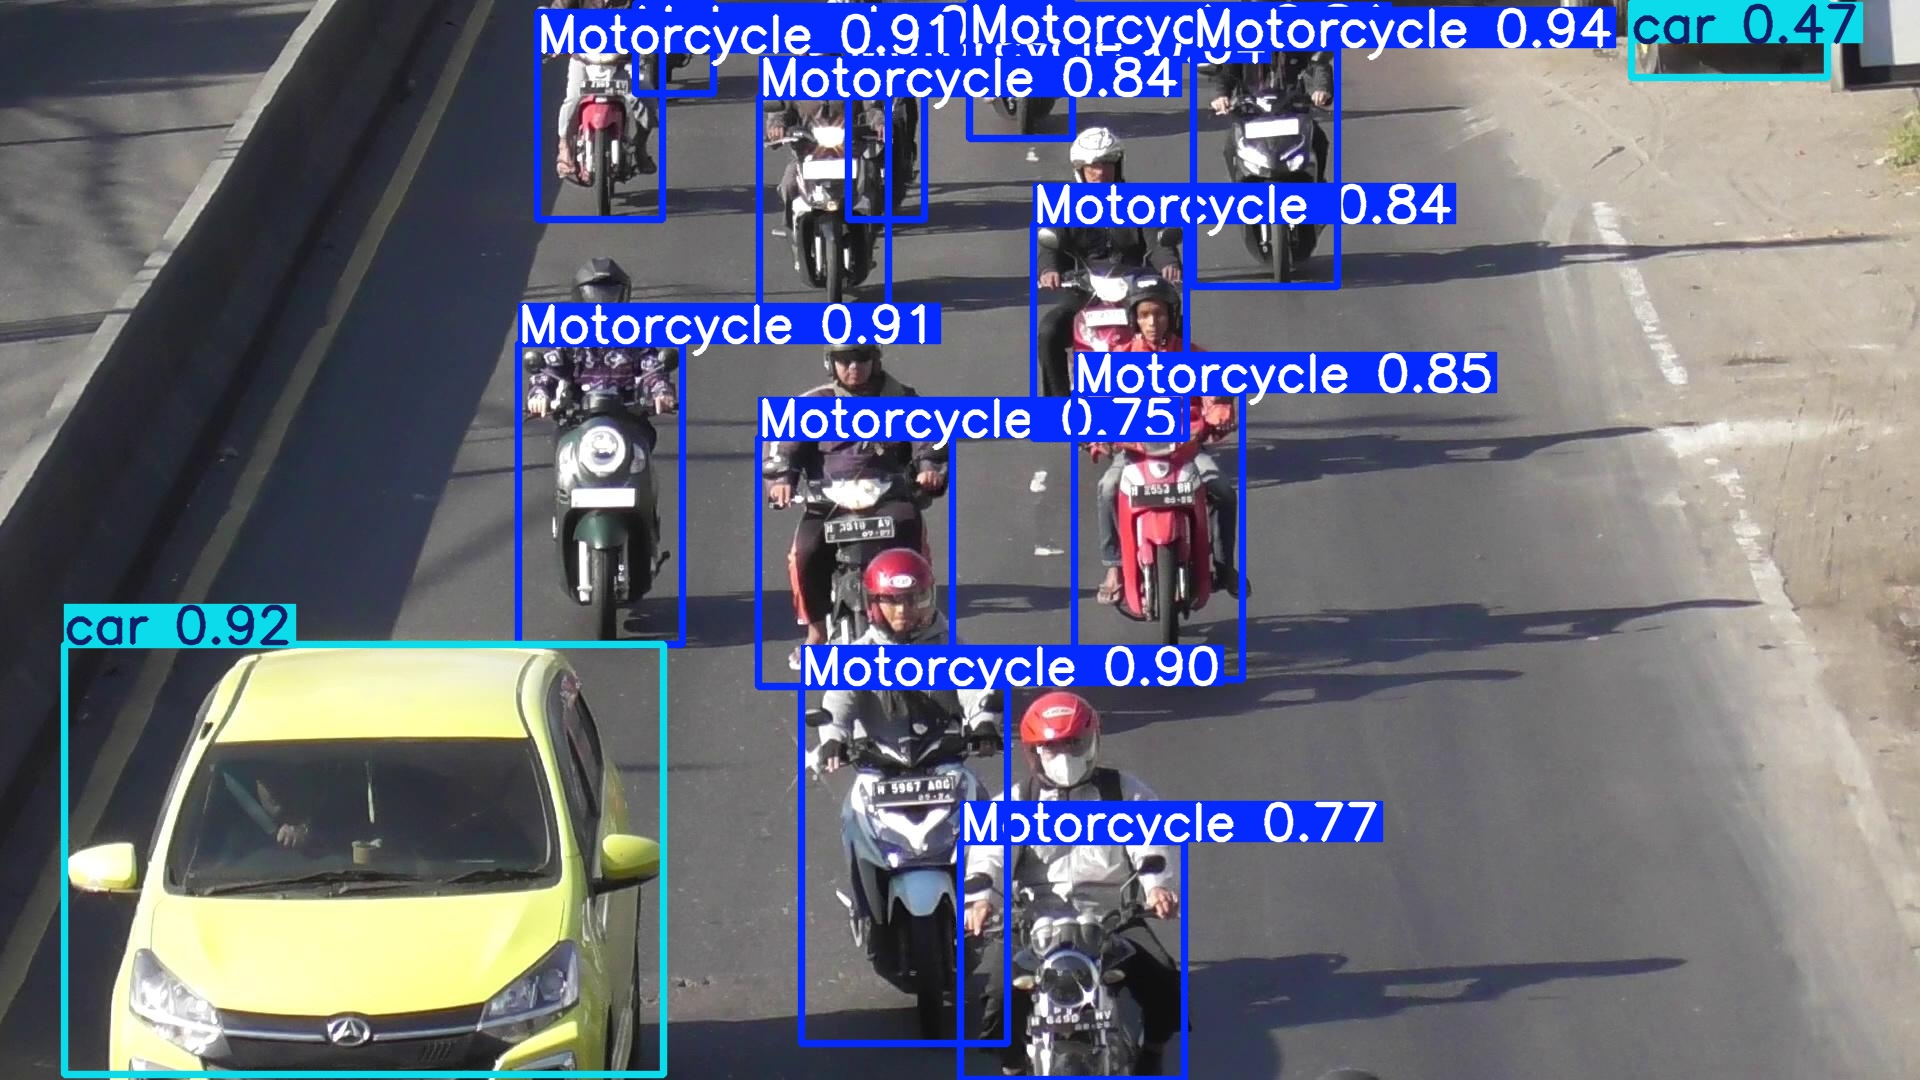

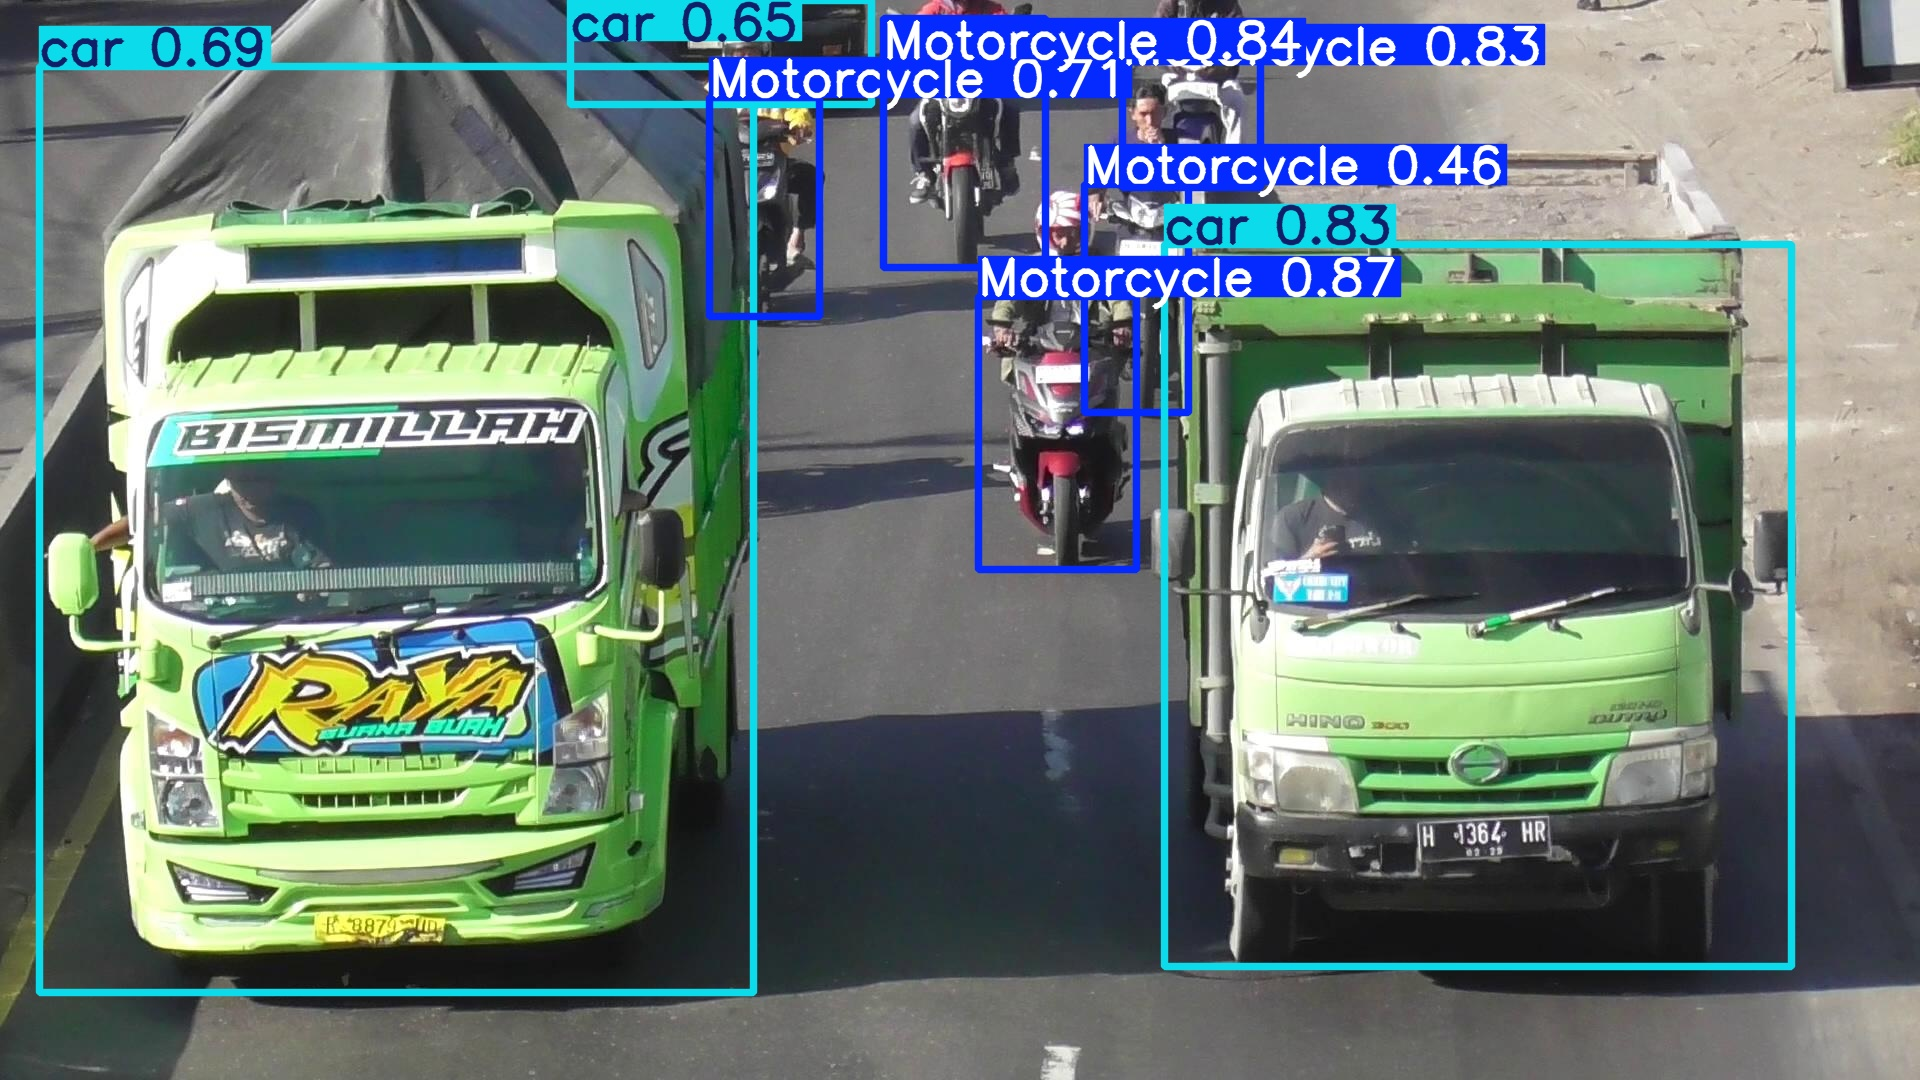

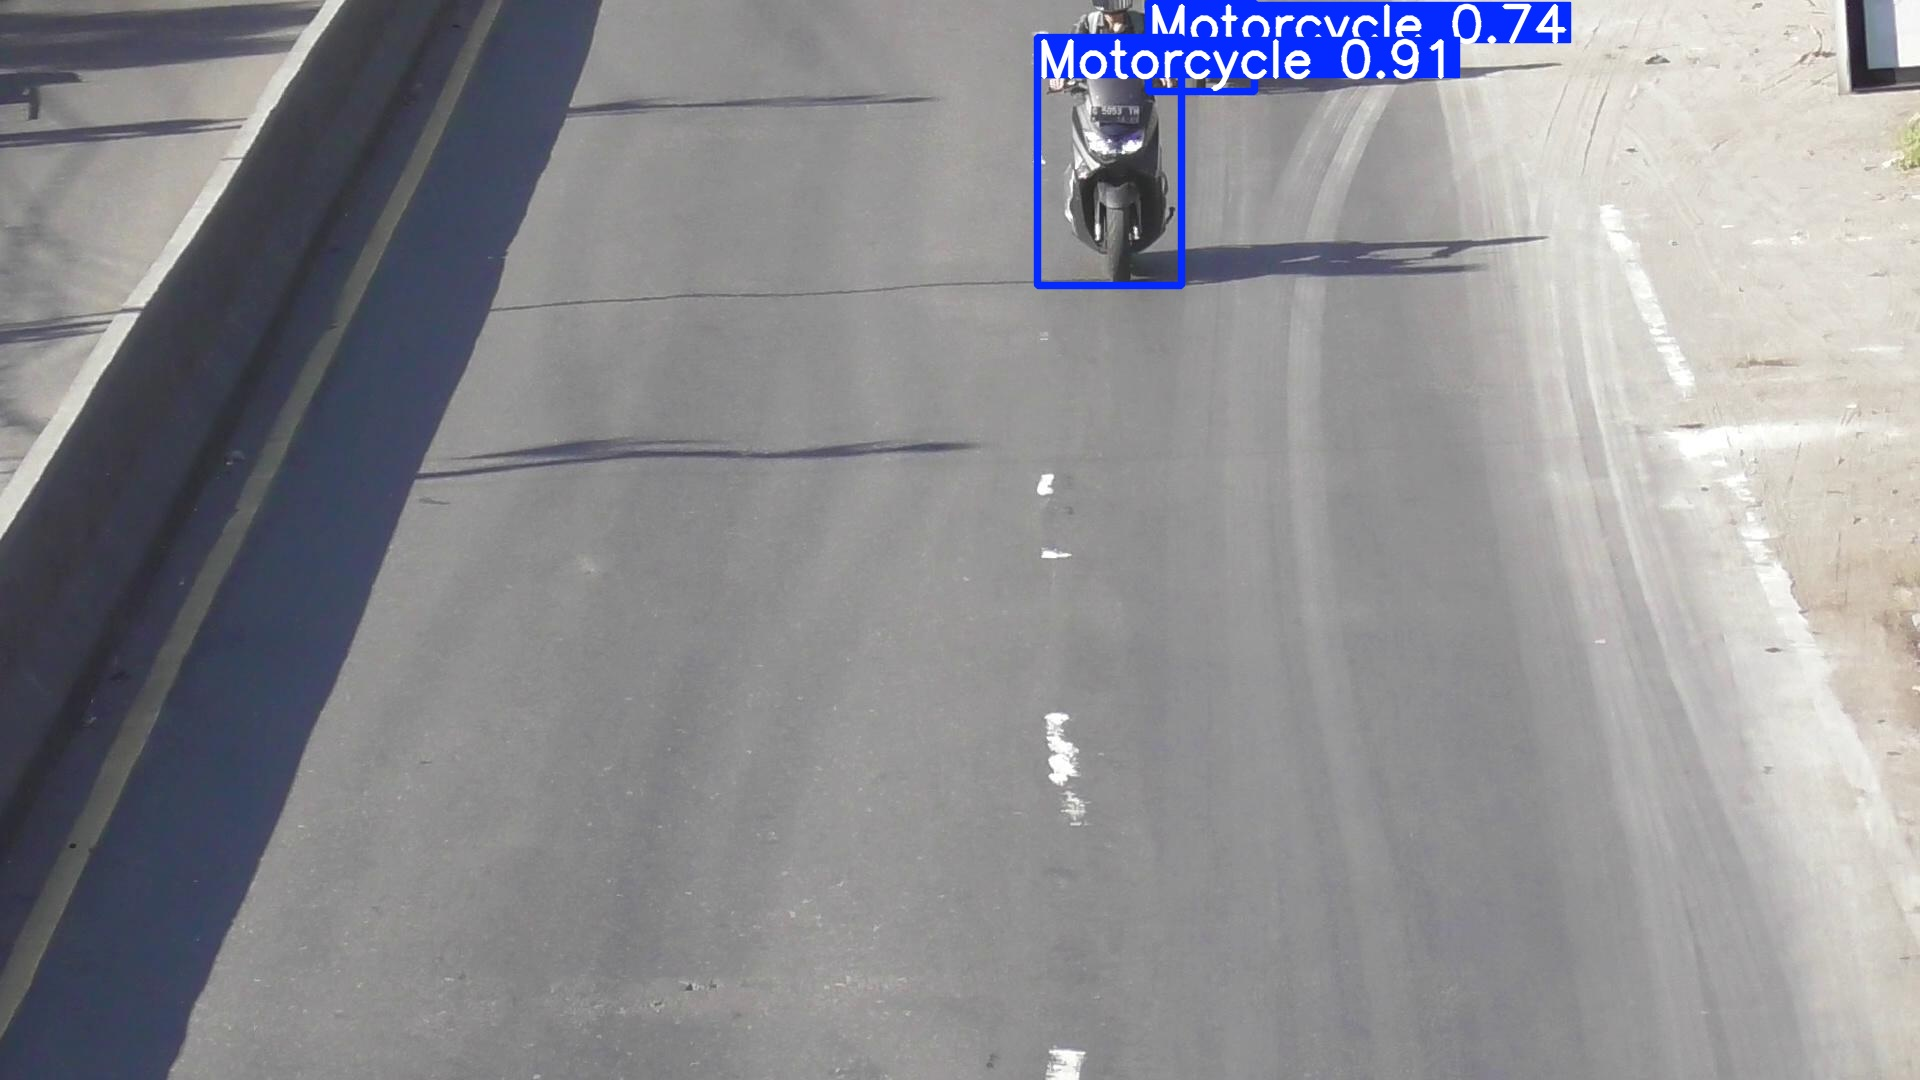

In [33]:
import glob
import os
from IPython.display import Image as IPymage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[2:5]:
  display(IPymage(filename=img, width=600))
  print("\n")